# Kickstarter exploration

Prepared by [Vincent Grégoire](http://www.vincentgregoire.com), Department of Finance, The University of Melbourne. 

Sample code to explore a dataset of [Kickstarter](https://www.kickstarter.com/) projects. The original dataset is availabel at <https://www.kaggle.com/kemical/kickstarter-projects>. The objective here is to show the basics for Python for data exploration and to show how to produce nice tables and plots. For a more in-depth exploration of the dataset (and way more plots!), have a look at <https://www.kaggle.com/kabure/kickstarter-projects-extensive-eda/notebook>.

This notebook was created as supplemental material to a Python for financial research workshop for finance honours and PhD students at the University of Melbourne in March of 2018.

Latest version: <https://github.com/vgreg/python-finance-unimelb2018>

In [1]:
# Make matplotlib static. Use notebook instead of inline to make interactive
%matplotlib inline

In [86]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load part of the dataset to have a look
df = pd.read_csv('kickstarter-projects/ks-projects-201801.csv', nrows=10)

In [4]:
# Let's have a look
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
# We see that there are two date/time columns, we'll tell pandas to parse them when loading the full file.
df = pd.read_csv('kickstarter-projects/ks-projects-201801.csv',
                 parse_dates=['deadline', 'launched'],
                 encoding = "ISO-8859-1")

In [6]:
# Get some general info on the dataset.
# Int is for integer, float for floating point (number with decimal), object for string (text) or mixed types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 43.3+ MB


## Summary statistics

We'll start by describing the dataset, to get an sense of the data. We will end this section by exporting nice tables of descriptive statistics to Excel and $\LaTeX$.

In [7]:
# Describe is the basic summary stats function for numerical values.
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Clearly, we don't care about all those columns. 
For example, we don't want stats on projects IDs. For the `goal` and `pledged` columns, we will focus on the version already converted to USD.

In [8]:
stats_cols = ['backers', 'usd_pledged_real', 'usd_goal_real']
df[stats_cols].describe()

,backers,usd_pledged_real,usd_goal_real
count,378661.000000,3.786610e+05,3.786610e+05
mean,105.617476,9.058924e+03,4.545440e+04
std,907.185035,9.097334e+04,1.152950e+06
min,0.000000,0.000000e+00,1.000000e-02
25%,2.000000,3.100000e+01,2.000000e+03
50%,12.000000,6.243300e+02,5.500000e+03
75%,56.000000,4.050000e+03,1.550000e+04
max,219382.000000,2.033899e+07,1.663614e+08


Now that is a bit better, but we are missing many columns which contain text. Some of those are unique (i.e., name) but most are categorical and could be used for aggregation. Those would be `category`, `main_category`, `currency`, `state` and `country`.

In [9]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [10]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [11]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended'], dtype=object)

We can easily have a quick look at the distribution of projects among these using `groupby()` and `count()`.

In [12]:
df.groupby('main_category')['ID'].count()

main_category
Art             28153
Comics          10819
Crafts           8809
Dance            3768
Design          30070
Fashion         22816
Film & Video    63585
Food            24602
Games           35231
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
Name: ID, dtype: int64

In [13]:
df.groupby('state')['ID'].count()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

In [14]:
# It would be nicer if those states were capitalized. We can easily do that
df['state'] = df['state'].str.capitalize()
df.groupby('state')['ID'].count()

state
Canceled       38779
Failed        197719
Live            2799
Successful    133956
Suspended       1846
Undefined       3562
Name: ID, dtype: int64

In [15]:
# We'll also rename some of the columns so that the output is cleaner.
df.columns = ['ID', 'name', 'category', 'Main category', 'currency', 'deadline',
              'goal', 'launched', 'pledged', 'State', 'Backers', 'country',
              'usd pledged', 'Pledged (USD)', 'Goal (USD)']

In [16]:
# Let's add a column that compute the funding percentage
df['Funding %'] = df['pledged'] / df['goal']

We'll create a summary stats table by `state`, but we'll only keep the `Successful` and `Failed` states because those are the most important one.

In [17]:
stats_cols = ['Backers', 'Pledged (USD)', 'Goal (USD)', 'Funding %']
desc_stats = df[df.State.isin(['Successful', 'Failed'])].groupby('State')[stats_cols].describe()
desc_stats

Backers                                                   \
               count        mean          std  min   25%   50%    75%   
State                                                                   
Failed      197719.0   16.422352    71.224123  0.0   1.0   3.0   12.0   
Successful  133956.0  263.921362  1504.580142  0.0  33.0  71.0  167.0   

                     Pledged (USD)                   ...      Goal (USD)  \
                 max         count          mean     ...             75%   
State                                                ...                   
Failed        6550.0      197719.0   1320.603817     ...         20000.0   
Successful  219382.0      133956.0  22670.795231     ...         10000.0   

                         Funding %                                            \
                     max     count      mean         std       min       25%   
State                                                                          
Failed      1.663614e+08  197719.0  0.090620    0.151825  0.000000  0.000303   
Successful  2.015609e+06  133956.0  8.557548  444.524971  0.853222  1.046429   

                                             
                 50%       75%          max  
State                                        
Failed      0.017143  0.112750       1.0797  
Successful  1.166667  1.631407  104277.8900  

[2 rows x 32 columns]

Not quite what we want. To make it look good, we need to transform the table. For that, we can use `transpose()`, `stack()`, `unstack()` and `pivot()`. In this case, we only need `transpose()` and `unstack()`.

In [18]:
desc_stats.transpose()

State                      Failed    Successful
Backers       count  1.977190e+05  1.339560e+05
              mean   1.642235e+01  2.639214e+02
              std    7.122412e+01  1.504580e+03
              min    0.000000e+00  0.000000e+00
              25%    1.000000e+00  3.300000e+01
              50%    3.000000e+00  7.100000e+01
              75%    1.200000e+01  1.670000e+02
              max    6.550000e+03  2.193820e+05
Pledged (USD) count  1.977190e+05  1.339560e+05
              mean   1.320604e+03  2.267080e+04
              std    6.820249e+03  1.510903e+05
              min    0.000000e+00  7.900000e-01
              25%    2.640000e+00  2.000000e+03
              50%    1.000000e+02  5.107250e+03
              75%    6.630000e+02  1.323208e+04
              max    7.573529e+05  2.033899e+07
Goal (USD)    count  1.977190e+05  1.339560e+05
              mean   6.317474e+04  9.532853e+03
              std    1.435683e+06  2.796144e+04
              min    1.500000e-01  1.000000e-02
              25%    2.500000e+03  1.301915e+03
              50%    7.500000e+03  3.837740e+03
              75%    2.000000e+04  1.000000e+04
              max    1.663614e+08  2.015609e+06
Funding %     count  1.977190e+05  1.339560e+05
              mean   9.062012e-02  8.557548e+00
              std    1.518252e-01  4.445250e+02
              min    0.000000e+00  8.532222e-01
              25%    3.030303e-04  1.046429e+00
              50%    1.714286e-02  1.166667e+00
              75%    1.127500e-01  1.631407e+00
              max    1.079700e+00  1.042779e+05

In [19]:
desc_stats.transpose().unstack(level=0)

State         Failed                                              \
             Backers  Pledged (USD)    Goal (USD)      Funding %   
count  197719.000000  197719.000000  1.977190e+05  197719.000000   
mean       16.422352    1320.603817  6.317474e+04       0.090620   
std        71.224123    6820.249351  1.435683e+06       0.151825   
min         0.000000       0.000000  1.500000e-01       0.000000   
25%         1.000000       2.640000  2.500000e+03       0.000303   
50%         3.000000     100.000000  7.500000e+03       0.017143   
75%        12.000000     663.000000  2.000000e+04       0.112750   
max      6550.000000  757352.940000  1.663614e+08       1.079700   

State     Successful                                             
             Backers Pledged (USD)    Goal (USD)      Funding %  
count  133956.000000  1.339560e+05  1.339560e+05  133956.000000  
mean      263.921362  2.267080e+04  9.532853e+03       8.557548  
std      1504.580142  1.510903e+05  2.796144e+04     444.524971  
min         0.000000  7.900000e-01  1.000000e-02       0.853222  
25%        33.000000  2.000000e+03  1.301915e+03       1.046429  
50%        71.000000  5.107250e+03  3.837740e+03       1.166667  
75%       167.000000  1.323208e+04  1.000000e+04       1.631407  
max    219382.000000  2.033899e+07  2.015609e+06  104277.890000

In [20]:
# This here is what we want!
desc_stats = desc_stats.transpose().unstack(level=0).transpose()
desc_stats

count          mean           std       min  \
State                                                                      
Failed     Backers        197719.0     16.422352  7.122412e+01  0.000000   
           Pledged (USD)  197719.0   1320.603817  6.820249e+03  0.000000   
           Goal (USD)     197719.0  63174.742222  1.435683e+06  0.150000   
           Funding %      197719.0      0.090620  1.518252e-01  0.000000   
Successful Backers        133956.0    263.921362  1.504580e+03  0.000000   
           Pledged (USD)  133956.0  22670.795231  1.510903e+05  0.790000   
           Goal (USD)     133956.0   9532.853357  2.796144e+04  0.010000   
           Funding %      133956.0      8.557548  4.445250e+02  0.853222   

                                  25%          50%           75%           max  
State                                                                           
Failed     Backers           1.000000     3.000000     12.000000  6.550000e+03  
           Pledged (USD)     2.640000   100.000000    663.000000  7.573529e+05  
           Goal (USD)     2500.000000  7500.000000  20000.000000  1.663614e+08  
           Funding %         0.000303     0.017143      0.112750  1.079700e+00  
Successful Backers          33.000000    71.000000    167.000000  2.193820e+05  
           Pledged (USD)  2000.000000  5107.250000  13232.075000  2.033899e+07  
           Goal (USD)     1301.915000  3837.740000  10000.000000  2.015609e+06  
           Funding %         1.046429     1.166667      1.631407  1.042779e+05

In [21]:
# We still need to rename the columns
desc_stats.columns = ['Count', 'Mean', 'Std. Dev.', 'Min.', '25th Pct.', 'Median', '75th Pct.', 'Max']
desc_stats

Count          Mean     Std. Dev.      Min.  \
State                                                                      
Failed     Backers        197719.0     16.422352  7.122412e+01  0.000000   
           Pledged (USD)  197719.0   1320.603817  6.820249e+03  0.000000   
           Goal (USD)     197719.0  63174.742222  1.435683e+06  0.150000   
           Funding %      197719.0      0.090620  1.518252e-01  0.000000   
Successful Backers        133956.0    263.921362  1.504580e+03  0.000000   
           Pledged (USD)  133956.0  22670.795231  1.510903e+05  0.790000   
           Goal (USD)     133956.0   9532.853357  2.796144e+04  0.010000   
           Funding %      133956.0      8.557548  4.445250e+02  0.853222   

                            25th Pct.       Median     75th Pct.           Max  
State                                                                           
Failed     Backers           1.000000     3.000000     12.000000  6.550000e+03  
           Pledged (USD)     2.640000   100.000000    663.000000  7.573529e+05  
           Goal (USD)     2500.000000  7500.000000  20000.000000  1.663614e+08  
           Funding %         0.000303     0.017143      0.112750  1.079700e+00  
Successful Backers          33.000000    71.000000    167.000000  2.193820e+05  
           Pledged (USD)  2000.000000  5107.250000  13232.075000  2.033899e+07  
           Goal (USD)     1301.915000  3837.740000  10000.000000  2.015609e+06  
           Funding %         1.046429     1.166667      1.631407  1.042779e+05

In [22]:
# We can export that to Excel
desc_stats.to_excel('DescStats_v1.xlsx')

This looks good, except that the number aren't pretty and columns width are wrong. We can fix that by telling pandas to use a specific number format. The way to do it has been asked and asnwered on [Stack Overflow](https://stackoverflow.com/questions/29974672/writing-pandas-dataframe-to-excel-with-different-formats-for-different-columns).

In [23]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('DescStats_v2.xlsx', engine='xlsxwriter')
desc_stats.to_excel(writer, sheet_name='Sheet1')

# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Add some cell formats.
format1 = workbook.add_format({'num_format': '#,##0.00'})
format2 = workbook.add_format({'num_format': '#,##0'})

# Set the column width.
worksheet.set_column('B:B', 18, None)

# Set the column format.
worksheet.set_column('D:D', None, format1)
worksheet.set_column('F:I', None, format1)
worksheet.set_column('C:C', None, format2)

# Set the column width and format.
worksheet.set_column('E:E', 12, format1)
worksheet.set_column('J:J', 14, format1)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

Note that pandas also offers `to_csv()` and `to_latex()` as export options (plus many more).

## Plotting

Next, we'll see how we can create simple plots using matplotlib.

In [27]:
# First, create new columns with the year of each date columns
df['launched_year'] = df['launched'].dt.year
df['deadline_year'] = df['deadline'].dt.year

In [41]:
# Next, compute the duration of the campain, in weeks
df['duration'] = np.round((df['deadline'] - df['launched']).dt.days / 7)

In [42]:
df['duration'].describe()

count    378661.000000
mean          4.676452
std           9.408233
min           0.000000
25%           4.000000
50%           4.000000
75%           5.000000
max        2391.000000
Name: duration, dtype: float64

In [44]:
pd.crosstab(df.launched_year, df.State)

State,Canceled,Failed,Live,Successful,Suspended,Undefined
launched_year,,,,,,
1970,6,0,0,0,1,0
2009,150,600,0,579,0,0
2010,926,4984,0,4593,16,0
2011,2144,11878,0,12171,44,0
2012,2631,20588,0,17892,52,2
2013,3690,21686,0,19415,58,2
2014,7418,38199,0,21107,270,751
2015,8927,44301,0,20971,721,2380
2016,7119,30526,2,18766,344,427


In [45]:
# We can safely drop all events with a 1970 start date.
df = df[df.launched_year != 1970]

In [46]:
pd.crosstab(df.launched_year, df.State)

State,Canceled,Failed,Live,Successful,Suspended,Undefined
launched_year,,,,,,
2009,150,600,0,579,0,0
2010,926,4984,0,4593,16,0
2011,2144,11878,0,12171,44,0
2012,2631,20588,0,17892,52,2
2013,3690,21686,0,19415,58,2
2014,7418,38199,0,21107,270,751
2015,8927,44301,0,20971,721,2380
2016,7119,30526,2,18766,344,427
2017,5766,24957,2675,18462,340,0


In [47]:
# Say we only want to compare fails and success, we can create a separate view of the dataset that
# contains only those states
df_result = df[df.State.isin(['Failed', 'Successful'])]
pd.crosstab(df_result.launched_year, df_result.State)

State,Failed,Successful
launched_year,,
2009,600,579
2010,4984,4593
2011,11878,12171
2012,20588,17892
2013,21686,19415
2014,38199,21107
2015,44301,20971
2016,30526,18766
2017,24957,18462


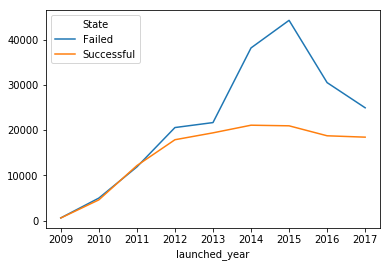

In [54]:
# Let's plot this instead
pd.crosstab(df_result.launched_year, df_result.State).plot()

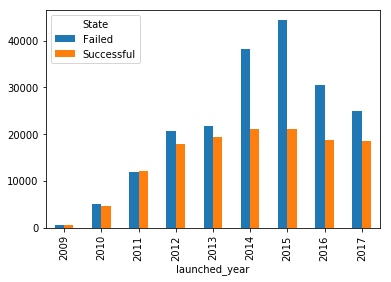

In [55]:
# Ok, but maybe a bar plot would be better.
pd.crosstab(df_result.launched_year, df_result.State).plot.bar()

The plot above is quite nice for data exploration. However, it's not quite ready yet for publication. We need to label the axis, add a title, format the number, etc. In the end, we want to export it as a high resolution file, or event better in a vector format such as pdf.

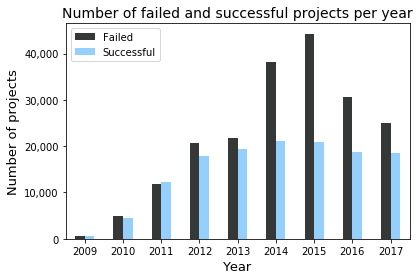

In [115]:
# Some additional imports - usually you would put these at the top of the notebook.
from matplotlib.ticker import FuncFormatter


# First change, let's capture the axis and set colors and hatches
# For the list of xkcd colors see https://xkcd.com/color/rgb/
ax = pd.crosstab(df_result.launched_year, df_result.State).plot.bar(
    color=['xkcd:dark gray', 'xkcd:light blue'])

# Set the label formatter of the y-axis to have thousand commas.
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate the year labels
ax.xaxis.set_tick_params(rotation=0)

# Add some labels
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of projects', fontsize=13)
# Add a title
ax.set_title('Number of failed and successful projects per year', fontsize=14)

# Set the location of the legend
ax.legend(loc='upper left')

# Tell matplotlib to make it look sharp
plt.tight_layout()

# Export to pdf
plt.savefig('BarPlot_States.pdf')